In [1]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

In [3]:
df_all_1key = pd.read_csv('features_ecb/features_ecb_3000/features_ecb_3000_1key_csv/features_all.csv')
df_all_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0867.txt.enc,txt_ecb,7.978479,126.095550,5555.243706,74.533507,0.023252,-1.224249,961038,10.238421,...,29,37,31,31,35,39,38,45,37,DES
1,file0877.txt.enc,txt_ecb,7.981284,127.278605,5521.647228,74.307787,0.005496,-1.205673,971121,10.238525,...,34,31,35,30,41,46,40,36,46,DES
2,file0712.txt.enc,txt_ecb,7.963368,127.618411,5563.193647,74.586820,-0.008240,-1.218510,529619,10.283705,...,16,22,21,17,15,18,21,27,23,DES
3,file0702.txt.enc,txt_ecb,7.959062,128.509038,5490.185688,74.095787,-0.017804,-1.198155,546473,10.251388,...,25,25,17,17,16,23,20,39,16,DES
4,file1006.txt.enc,txt_ecb,7.953983,126.376304,5482.106873,74.041251,0.015928,-1.206409,477179,10.185017,...,15,24,13,17,19,24,20,20,17,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,file0536.html.enc,html_ecb,7.805696,129.879808,5661.353823,75.241968,-0.063861,-1.252478,114075,10.473180,...,1,4,5,2,4,1,6,4,4,AES
17996,file0205.html.enc,html_ecb,7.981634,128.431202,5427.183833,73.669423,-0.024039,-1.181797,1073624,10.199673,...,35,47,48,36,32,40,37,55,44,AES
17997,file0063.html.enc,html_ecb,7.848859,128.222321,5528.960395,74.356979,-0.056685,-1.195608,118379,10.280833,...,5,3,5,2,2,4,6,5,6,AES
17998,file0062.html.enc,html_ecb,7.969449,128.226385,5404.567138,73.515761,-0.013679,-1.189359,661272,10.203163,...,27,32,23,23,35,17,24,20,19,AES


In [4]:
df_all_3keys = pd.read_csv('features_ecb/features_ecb_3000/features_ecb_3000_3keys_csv/features_all.csv')
df_all_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0867.txt.enc,txt_ecb,7.981624,127.426592,5442.272535,73.771760,-0.006880,-1.191480,957737,10.220822,...,38,33,38,41,34,39,39,34,44,DES
1,file0877.txt.enc,txt_ecb,7.981967,127.437284,5504.225557,74.190468,0.017669,-1.202220,985503,10.314061,...,50,39,42,39,28,28,36,39,40,DES
2,file0712.txt.enc,txt_ecb,7.963296,127.999601,5471.641773,73.970547,-0.022969,-1.209795,534526,10.331235,...,21,18,22,20,16,13,17,18,14,DES
3,file0702.txt.enc,txt_ecb,7.966266,126.285385,5529.337402,74.359515,0.009329,-1.204360,536162,10.154215,...,24,30,25,18,23,16,24,24,22,DES
4,file1006.txt.enc,txt_ecb,7.960599,126.806522,5408.606479,73.543229,0.004558,-1.192615,484734,10.265328,...,19,13,16,20,14,10,23,19,19,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,file0536.html.enc,html_ecb,7.811970,131.750000,5276.364423,72.638588,-0.090066,-1.137278,112220,10.387678,...,5,5,1,4,6,3,1,3,10,AES
17996,file0205.html.enc,html_ecb,7.980737,127.172093,5326.833756,72.985161,0.009122,-1.165434,1107102,10.357477,...,35,34,46,37,33,39,42,42,36,AES
17997,file0063.html.enc,html_ecb,7.845924,128.049107,5512.984196,74.249473,0.003686,-1.199928,120401,10.368264,...,9,4,1,5,3,3,4,6,6,AES
17998,file0062.html.enc,html_ecb,7.971661,126.717884,5407.556431,73.536089,0.018175,-1.202882,670664,10.275365,...,32,38,23,17,23,24,17,18,26,AES


In [5]:
df_all_6keys = pd.read_csv('features_ecb/features_ecb_3000/features_ecb_3000_6keys_csv/features_all.csv')
df_all_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0867.txt.enc,txt_ecb,7.981305,127.470877,5386.461194,73.392515,-0.007161,-1.187506,982187,10.350463,...,31,35,36,29,35,31,26,35,30,DES
1,file0877.txt.enc,txt_ecb,7.981126,127.297927,5497.814737,74.147250,0.014385,-1.198972,973058,10.248731,...,31,41,48,35,37,34,41,40,38,DES
2,file0712.txt.enc,txt_ecb,7.959329,129.396565,5395.386666,73.453296,-0.013054,-1.185291,544104,10.423385,...,17,17,25,18,20,26,20,24,22,DES
3,file0702.txt.enc,txt_ecb,7.968698,126.418846,5484.076876,74.054553,0.017055,-1.210033,553752,10.319436,...,21,23,20,11,21,23,17,13,19,DES
4,file1006.txt.enc,txt_ecb,7.960690,128.619130,5563.674504,74.590043,-0.009353,-1.212446,481834,10.234575,...,15,21,24,24,20,18,18,22,14,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,file0536.html.enc,html_ecb,7.798956,125.392308,5448.084556,73.811141,0.036034,-1.200334,111480,10.353372,...,7,4,7,5,2,3,4,2,1,AES
17996,file0205.html.enc,html_ecb,7.983108,128.025291,5592.613217,74.783776,-0.014812,-1.223938,1075775,10.209886,...,32,52,42,36,47,45,53,41,52,AES
17997,file0063.html.enc,html_ecb,7.827906,128.113393,5599.636249,74.830717,0.005648,-1.254594,119415,10.325722,...,3,6,6,3,5,6,4,4,4,AES
17998,file0062.html.enc,html_ecb,7.970676,127.219616,5540.445944,74.434172,0.015745,-1.213349,675949,10.315772,...,21,23,24,21,34,24,24,31,30,AES


In [6]:
encoder = LabelEncoder()
df_all_1key['algorithm'] = encoder.fit_transform(df_all_1key['algorithm'])
print(encoder.classes_)

X = df_all_1key.drop(columns=["algorithm", "file_name", "format"])
y = df_all_1key["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []
    
    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

(<pandas.io.formats.style.Styler at 0x154fcdd90>,
 <pandas.io.formats.style.Styler at 0x1541addf0>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.783444,0.007432,0.792631,0.008059,0.783444,0.007432,0.780885,0.007980,0.628589,0.954968
1,SVM,0.399222,0.007592,0.408171,0.015780,0.399222,0.007592,0.351635,0.008756,1.198794,0.726740
2,NaiveBayes,0.270667,0.007219,0.271617,0.008763,0.270667,0.007219,0.208610,0.007283,25.305566,0.579358
3,KNN,0.577833,0.006028,0.593207,0.007757,0.577833,0.006028,0.569543,0.007316,6.407198,0.809237
4,Bagging,0.773722,0.003350,0.780291,0.005058,0.773722,0.003350,0.771635,0.003888,0.559311,0.952318
5,AdaBoost,0.506222,0.016913,0.569090,0.026207,0.506222,0.016913,0.489959,0.027964,1.584426,0.803719


In [2]:
import pandas as pd
import io

csv_data = """
RandomForest,0.783444,0.007432,0.792631,0.008059,0.783444,0.007432,0.780885,0.007980,0.628589,0.954968
SVM,0.399222,0.007592,0.408171,0.015780,0.399222,0.007592,0.351635,0.008756,1.198794,0.726740
NaiveBayes,0.270667,0.007219,0.271617,0.008763,0.270667,0.007219,0.208610,0.007283,25.305566,0.579358
KNN,0.577833,0.006028,0.593207,0.007757,0.577833,0.006028,0.569543,0.007316,6.407198,0.809237
Bagging,0.773722,0.003350,0.780291,0.005058,0.773722,0.003350,0.771635,0.003888,0.559311,0.952318
AdaBoost,0.506222,0.016913,0.569090,0.026207,0.506222,0.016913,0.489959,0.027964,1.584426,0.803719
"""

# Definicje polskich nazw kolumn
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.783444,0.007432,0.792631,0.008059,0.783444,0.007432,0.780885,0.007980,0.628589,0.954968
1,SVM,0.399222,0.007592,0.408171,0.015780,0.399222,0.007592,0.351635,0.008756,1.198794,0.726740
2,NaiveBayes,0.270667,0.007219,0.271617,0.008763,0.270667,0.007219,0.208610,0.007283,25.305566,0.579358
3,KNN,0.577833,0.006028,0.593207,0.007757,0.577833,0.006028,0.569543,0.007316,6.407198,0.809237
4,Bagging,0.773722,0.003350,0.780291,0.005058,0.773722,0.003350,0.771635,0.003888,0.559311,0.952318
5,AdaBoost,0.506222,0.016913,0.569090,0.026207,0.506222,0.016913,0.489959,0.027964,1.584426,0.803719


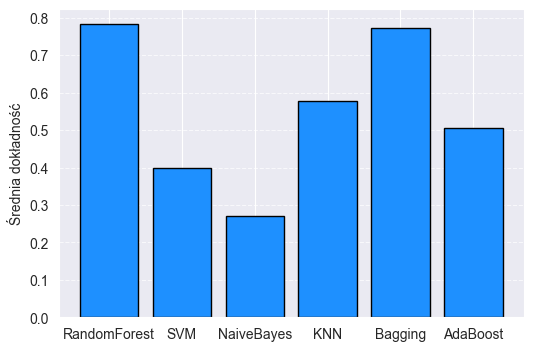

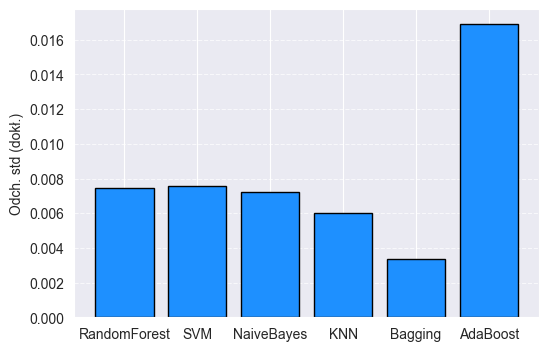

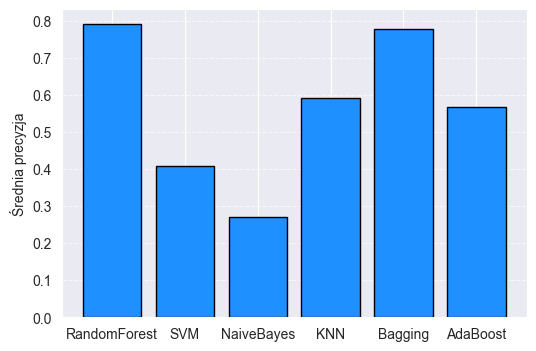

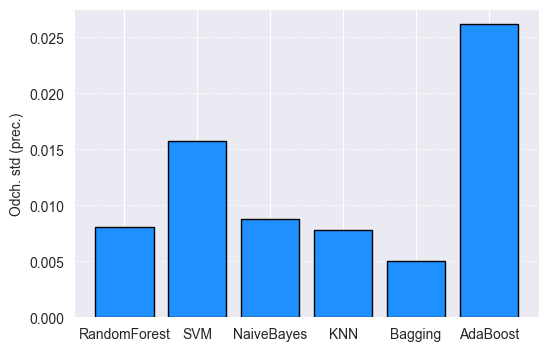

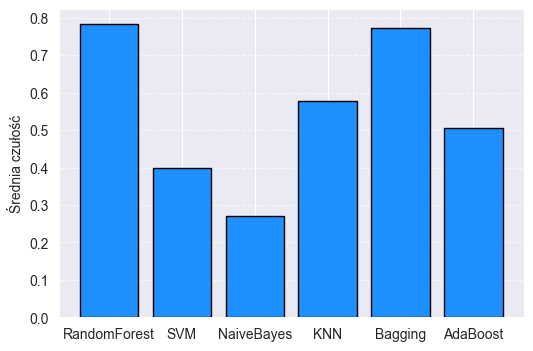

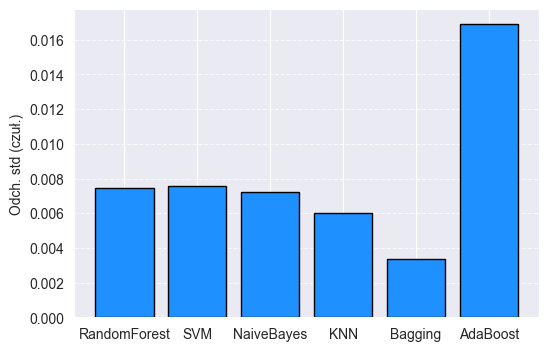

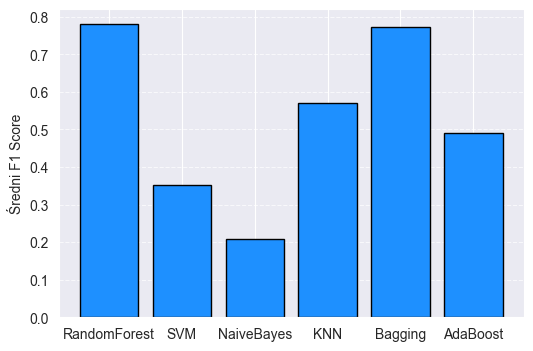

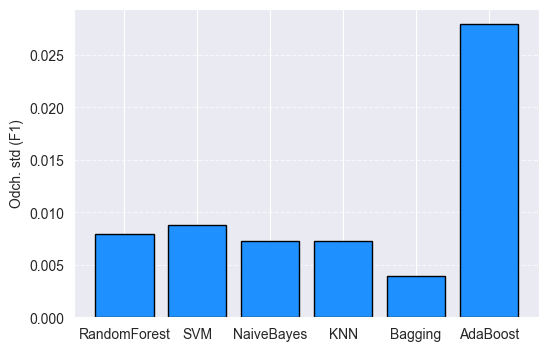

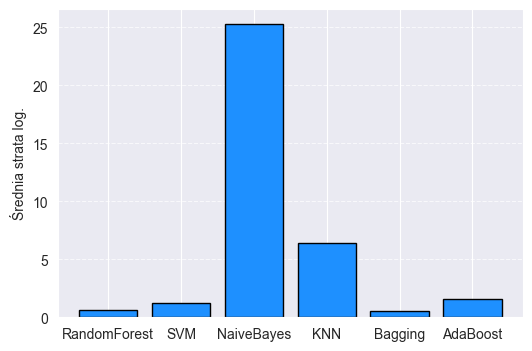

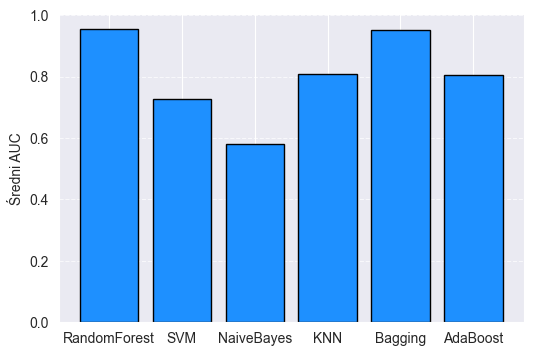

In [3]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

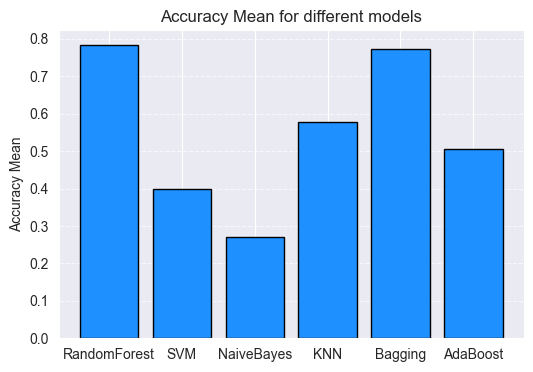

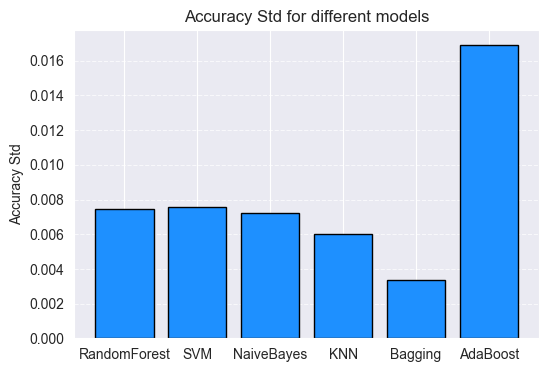

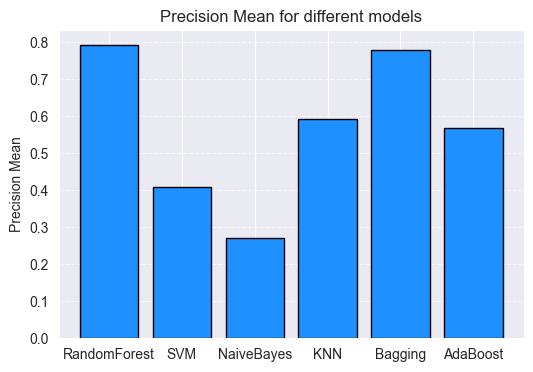

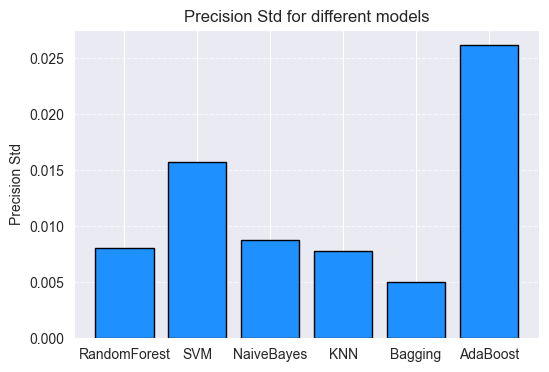

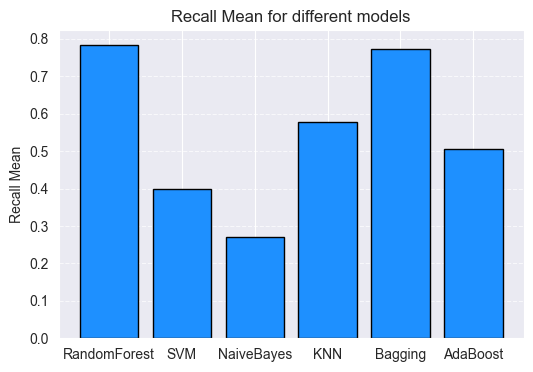

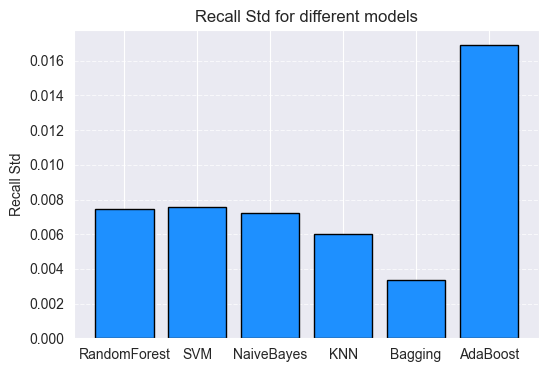

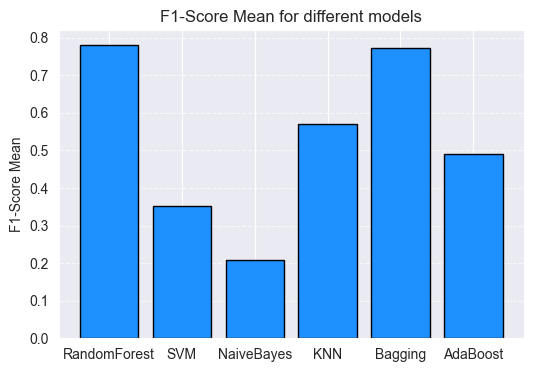

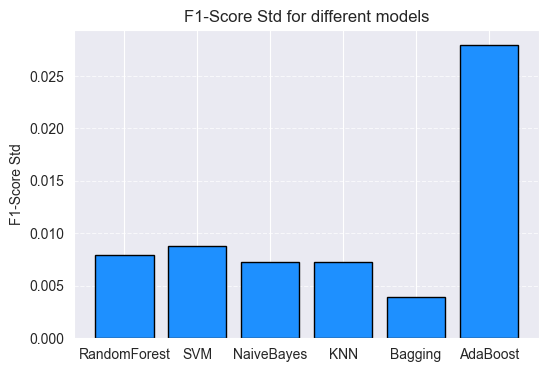

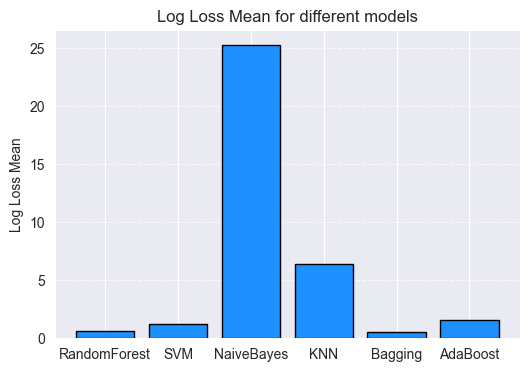

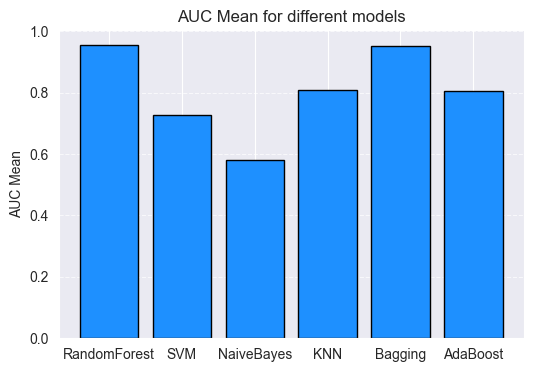

Best model: RandomForest with F1-Score = 0.7808724026288237
Worst model: NaiveBayes with F1-Score = 0.20862198221549355


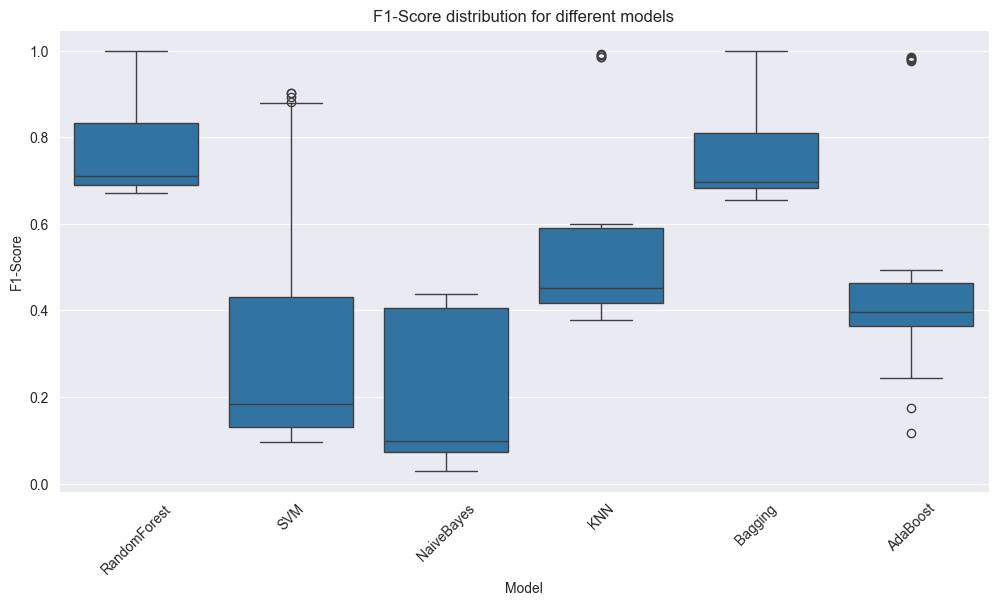

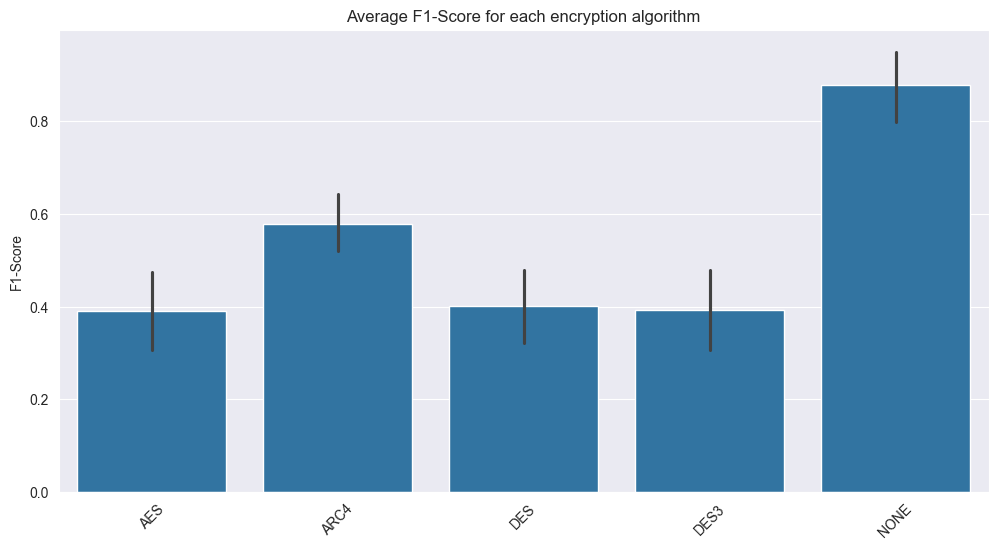

In [9]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [6]:
df_class_results_1key = pd.read_csv('training_3000_ecb/df_class_results_3000_ecb_1key.csv')
df_class_results_1key

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.608400,0.758133,0.675063
1,1,RandomForest,1,0.765906,0.886111,0.821636
2,2,RandomForest,2,0.795571,0.631081,0.703843
3,3,RandomForest,3,0.795181,0.646154,0.712963
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.255375,0.696710,0.373753
146,146,AdaBoost,1,0.676692,0.248276,0.363269
147,147,AdaBoost,2,0.482587,0.402490,0.438914
148,148,AdaBoost,3,0.527473,0.065753,0.116931


In [7]:
encoder = LabelEncoder()
df_all_3keys['algorithm'] = encoder.fit_transform(df_all_3keys['algorithm'])
print(encoder.classes_)

X = df_all_3keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_3keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


(<pandas.io.formats.style.Styler at 0x1377a0bb0>,
 <pandas.io.formats.style.Styler at 0x1376554c0>)

In [8]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.722333,0.005778,0.731336,0.006115,0.722333,0.005778,0.722244,0.006046,0.745303,0.926525
1,SVM,0.397778,0.008257,0.410683,0.012521,0.397778,0.008257,0.348073,0.010180,1.209361,0.729821
2,NaiveBayes,0.270611,0.007622,0.250985,0.012225,0.270611,0.007622,0.209158,0.006594,25.303216,0.578661
3,KNN,0.531722,0.010031,0.548086,0.007584,0.531722,0.010031,0.523987,0.008854,7.074597,0.779222
4,Bagging,0.716889,0.004892,0.725129,0.006014,0.716889,0.004892,0.716477,0.005418,0.660368,0.927641
5,AdaBoost,0.467667,0.017459,0.534676,0.050272,0.467667,0.017459,0.408688,0.036483,1.584685,0.763511


In [5]:
import pandas as pd
import io

csv_data = """
RandomForest,0.722333,0.005778,0.731336,0.006115,0.722333,0.005778,0.722244,0.006046,0.745303,0.926525
SVM,0.397778,0.008257,0.410683,0.012521,0.397778,0.008257,0.348073,0.010180,1.209361,0.729821
NaiveBayes,0.270611,0.007622,0.250985,0.012225,0.270611,0.007622,0.209158,0.006594,25.303216,0.578661
KNN,0.531722,0.010031,0.548086,0.007584,0.531722,0.010031,0.523987,0.008854,7.074597,0.779222
Bagging,0.716889,0.004892,0.725129,0.006014,0.716889,0.004892,0.716477,0.005418,0.660368,0.927641
AdaBoost,0.467667,0.017459,0.534676,0.050272,0.467667,0.017459,0.408688,0.036483,1.584685,0.763511
"""

# Definicje polskich nazw kolumn
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.722333,0.005778,0.731336,0.006115,0.722333,0.005778,0.722244,0.006046,0.745303,0.926525
1,SVM,0.397778,0.008257,0.410683,0.012521,0.397778,0.008257,0.348073,0.010180,1.209361,0.729821
2,NaiveBayes,0.270611,0.007622,0.250985,0.012225,0.270611,0.007622,0.209158,0.006594,25.303216,0.578661
3,KNN,0.531722,0.010031,0.548086,0.007584,0.531722,0.010031,0.523987,0.008854,7.074597,0.779222
4,Bagging,0.716889,0.004892,0.725129,0.006014,0.716889,0.004892,0.716477,0.005418,0.660368,0.927641
5,AdaBoost,0.467667,0.017459,0.534676,0.050272,0.467667,0.017459,0.408688,0.036483,1.584685,0.763511


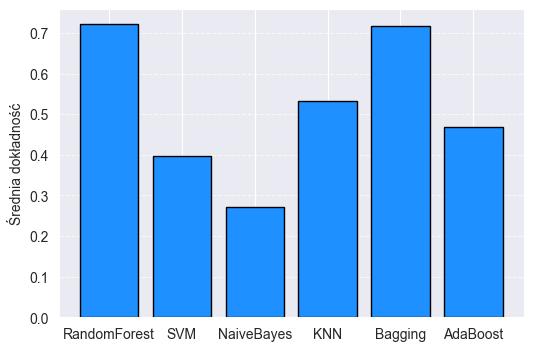

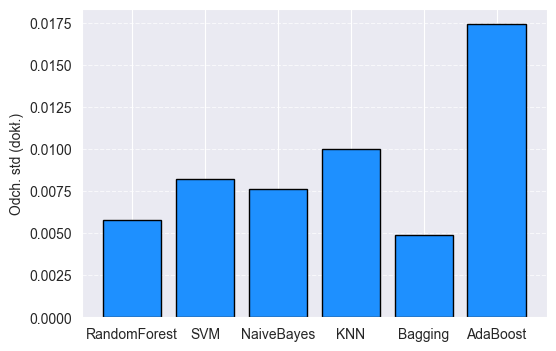

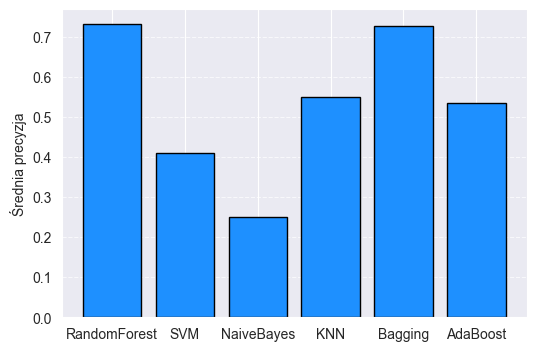

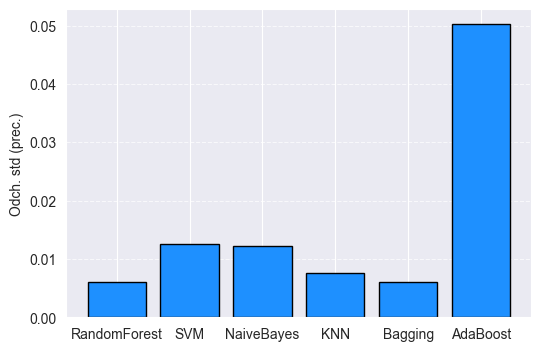

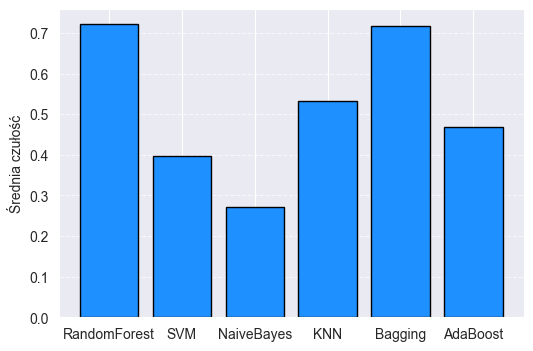

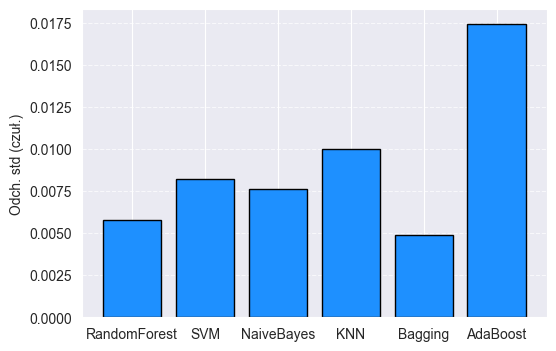

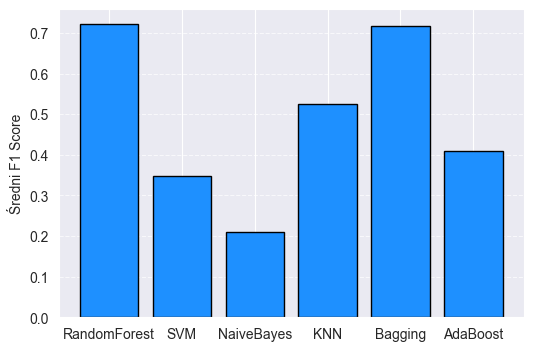

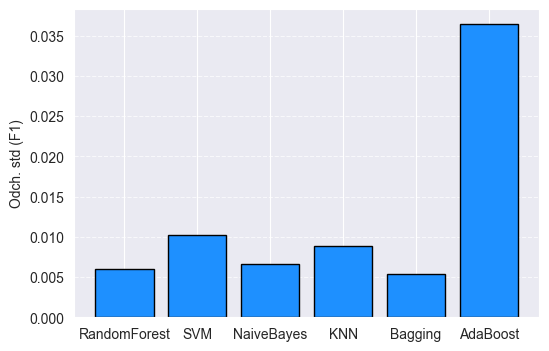

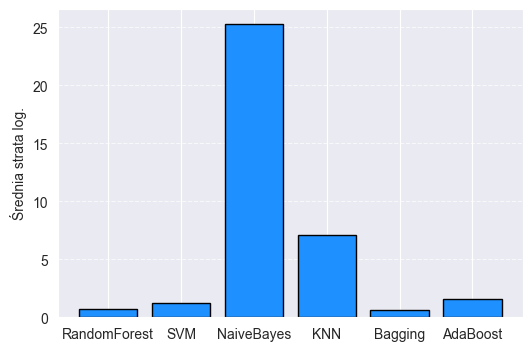

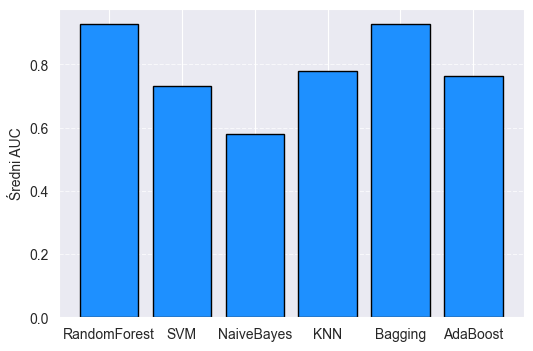

In [6]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

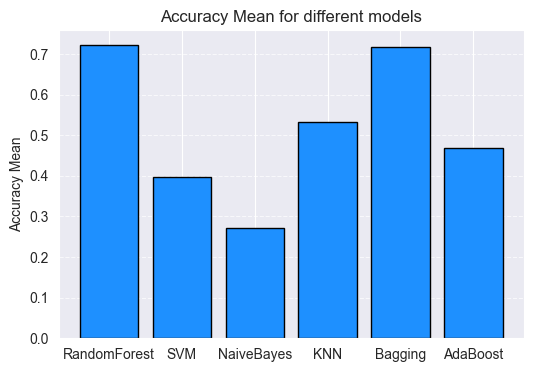

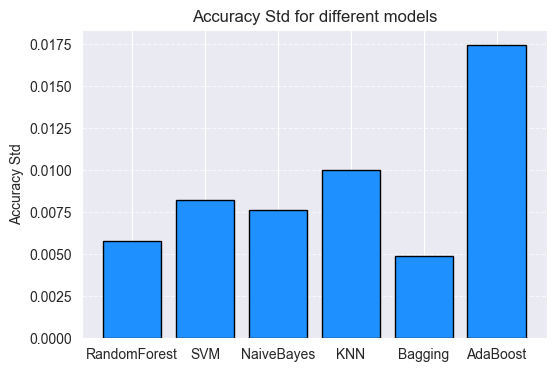

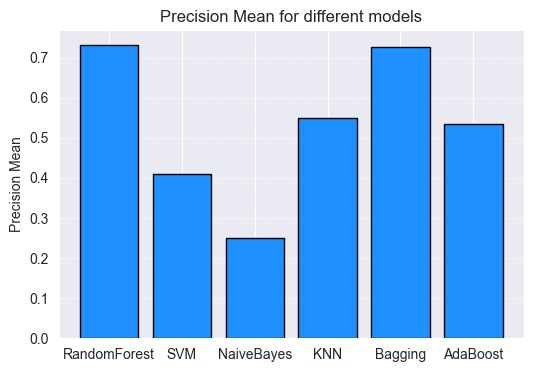

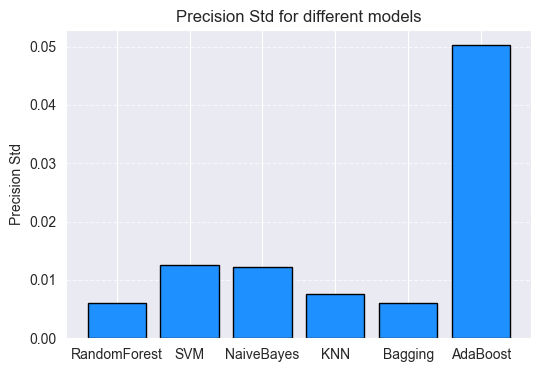

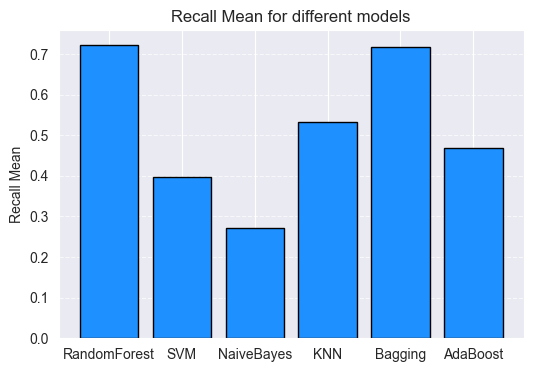

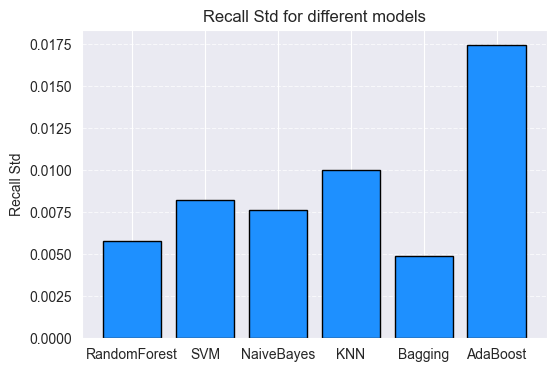

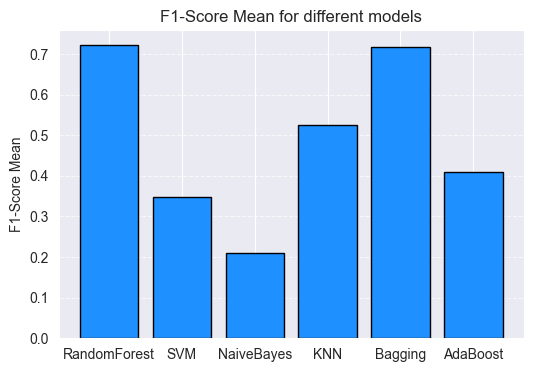

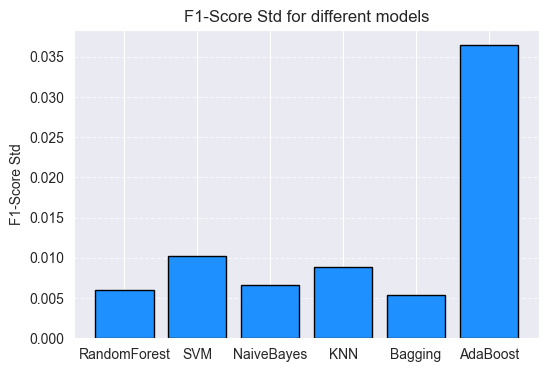

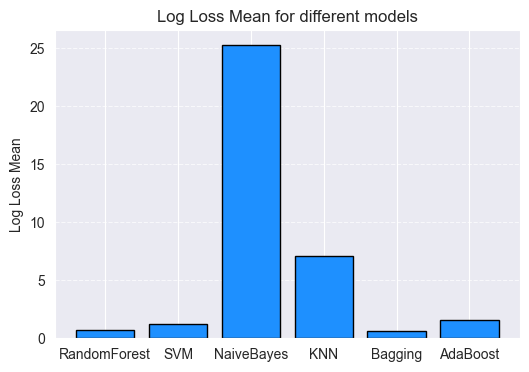

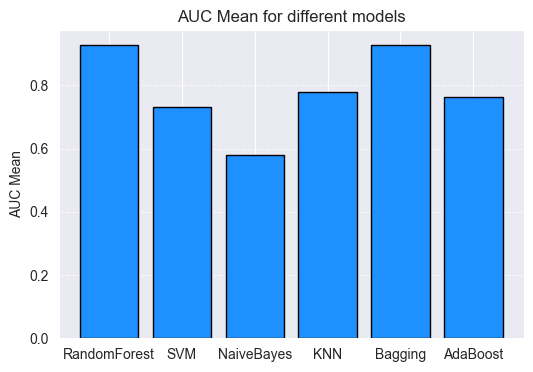

Best model: RandomForest with F1-Score = 0.722210946975996
Worst model: NaiveBayes with F1-Score = 0.20915246511224317


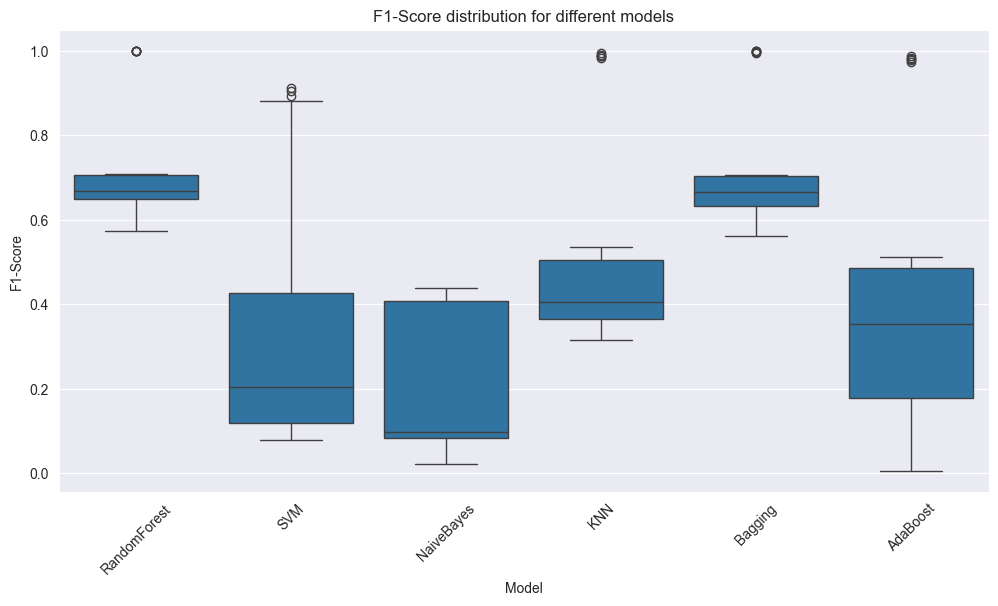

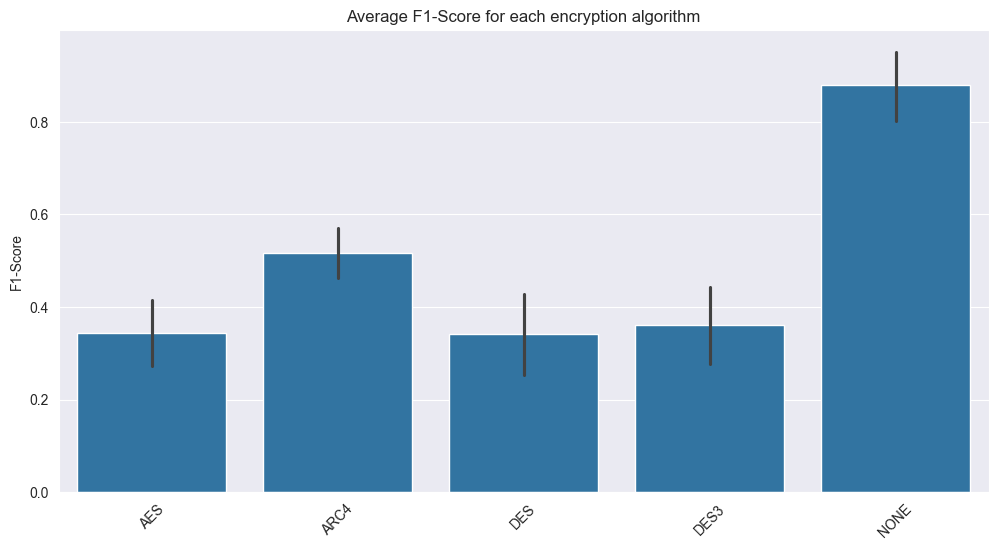

In [9]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [11]:
df_class_results_3keys = pd.read_csv('training_3000_ecb/df_class_results_3000_ecb_3keys.csv')
df_class_results_3keys

,0,RandomForest,0.1,0.546036,0.603960,0.573539
0,1,RandomForest,1,0.619625,0.780556,0.690842
1,2,RandomForest,2,0.725363,0.606757,0.660780
2,3,RandomForest,3,0.759582,0.609790,0.676493
3,4,RandomForest,4,1.000000,1.000000,1.000000
4,5,RandomForest,0,0.578104,0.614184,0.595598
...,...,...,...,...,...,...
144,145,AdaBoost,0,0.423077,0.047210,0.084942
145,146,AdaBoost,1,0.339800,0.845517,0.484777
146,147,AdaBoost,2,0.306982,0.413555,0.352387
147,148,AdaBoost,3,0.375000,0.004110,0.008130


In [12]:
encoder = LabelEncoder()
df_all_6keys['algorithm'] = encoder.fit_transform(df_all_6keys['algorithm'])
print(encoder.classes_)

X = df_all_6keys.drop(columns=["algorithm", "file_name", "format"])
y = df_all_6keys["algorithm"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_list = []
class_results = {model_name: [] for model_name in models}

for model_name, model in models.items():
    acc_scores, precision_scores, recall_scores, f1_scores = [], [], [], []
    log_losses, auc_scores = [], []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]  # dla pandas.DataFrame
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        if y_pred_proba is not None:
            log_losses.append(log_loss(y_test, y_pred_proba))
            auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))
        else:
            log_losses.append(None)
            auc_scores.append(None)

        class_precision = precision_score(y_test, y_pred, average=None)
        class_recall = recall_score(y_test, y_pred, average=None)
        class_f1 = f1_score(y_test, y_pred, average=None)

        for i, class_label in enumerate(np.unique(y)):
            class_results[model_name].append({
                "Class": class_label,
                "Precision": class_precision[i],
                "Recall": class_recall[i],
                "F1-Score": class_f1[i]
            })

    results_list.append({
        "Model": model_name,
        "Accuracy Mean": np.mean(acc_scores),
        "Accuracy Std": np.std(acc_scores),
        "Precision Mean": np.mean(precision_scores),
        "Precision Std": np.std(precision_scores),
        "Recall Mean": np.mean(recall_scores),
        "Recall Std": np.std(recall_scores),
        "F1-Score Mean": np.mean(f1_scores),
        "F1-Score Std": np.std(f1_scores),
        "Log Loss Mean": np.mean([x for x in log_losses if x is not None]) if any(log_losses) else None,
        "AUC Mean": np.mean([x for x in auc_scores if x is not None]) if any(auc_scores) else None
    })

df_results = pd.DataFrame(results_list)
df_class_results = pd.DataFrame([
    {"Model": model, **result} for model, results in class_results.items() for result in results
])

df_results.style.format("{:.4f}"), df_class_results.style.format("{:.4f}")

['AES' 'ARC4' 'DES' 'DES3' 'NONE']


(<pandas.io.formats.style.Styler at 0x137744d60>,
 <pandas.io.formats.style.Styler at 0x169b2d3d0>)

In [13]:
df_results

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std,Log Loss Mean,AUC Mean
0,RandomForest,0.692500,0.007460,0.702972,0.007850,0.692500,0.007460,0.693617,0.007732,0.803058,0.907448
1,SVM,0.398889,0.008714,0.410458,0.013111,0.398889,0.008714,0.350506,0.010419,1.207621,0.727184
2,NaiveBayes,0.271833,0.007952,0.263292,0.018442,0.271833,0.007952,0.210813,0.007701,25.300166,0.575013
3,KNN,0.518111,0.006656,0.530349,0.006960,0.518111,0.006656,0.509771,0.008278,7.214067,0.768997
4,Bagging,0.685056,0.008883,0.694033,0.009643,0.685056,0.008883,0.685663,0.008817,0.709004,0.912876
5,AdaBoost,0.466333,0.009478,0.561090,0.032246,0.466333,0.009478,0.423744,0.030864,1.584737,0.756649


In [8]:
import pandas as pd
import io

csv_data = """
RandomForest,0.692500,0.007460,0.702972,0.007850,0.692500,0.007460,0.693617,0.007732,0.803058,0.907448
SVM,0.398889,0.008714,0.410458,0.013111,0.398889,0.008714,0.350506,0.010419,1.207621,0.727184
NaiveBayes,0.271833,0.007952,0.263292,0.018442,0.271833,0.007952,0.210813,0.007701,25.300166,0.575013
KNN,0.518111,0.006656,0.530349,0.006960,0.518111,0.006656,0.509771,0.008278,7.214067,0.768997
Bagging,0.685056,0.008883,0.694033,0.009643,0.685056,0.008883,0.685663,0.008817,0.709004,0.912876
AdaBoost,0.466333,0.009478,0.561090,0.032246,0.466333,0.009478,0.423744,0.030864,1.584737,0.756649
"""

# Definicje polskich nazw kolumn (wszystkie 11 kolumn)
column_names = [
    "Model",
    "Średnia dokładność",
    "Odch. std (dokł.)",
    "Średnia precyzja",
    "Odch. std (prec.)",
    "Średnia czułość",
    "Odch. std (czuł.)",
    "Średni F1 Score",
    "Odch. std (F1)",
    "Średnia strata log.",
    "Średni AUC"
]

# Wczytanie danych CSV do DataFrame
# Używamy io.StringIO, aby traktować string csv_data jak plik
df = pd.read_csv(io.StringIO(csv_data), header=None)

# Przypisanie polskich nazw kolumn
df.columns = column_names

# Wyświetlenie DataFrame
df

,Model,Średnia dokładność,Odch. std (dokł.),Średnia precyzja,Odch. std (prec.),Średnia czułość,Odch. std (czuł.),Średni F1 Score,Odch. std (F1),Średnia strata log.,Średni AUC
0,RandomForest,0.692500,0.007460,0.702972,0.007850,0.692500,0.007460,0.693617,0.007732,0.803058,0.907448
1,SVM,0.398889,0.008714,0.410458,0.013111,0.398889,0.008714,0.350506,0.010419,1.207621,0.727184
2,NaiveBayes,0.271833,0.007952,0.263292,0.018442,0.271833,0.007952,0.210813,0.007701,25.300166,0.575013
3,KNN,0.518111,0.006656,0.530349,0.006960,0.518111,0.006656,0.509771,0.008278,7.214067,0.768997
4,Bagging,0.685056,0.008883,0.694033,0.009643,0.685056,0.008883,0.685663,0.008817,0.709004,0.912876
5,AdaBoost,0.466333,0.009478,0.561090,0.032246,0.466333,0.009478,0.423744,0.030864,1.584737,0.756649


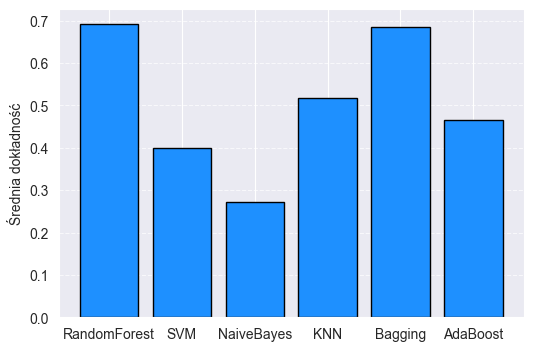

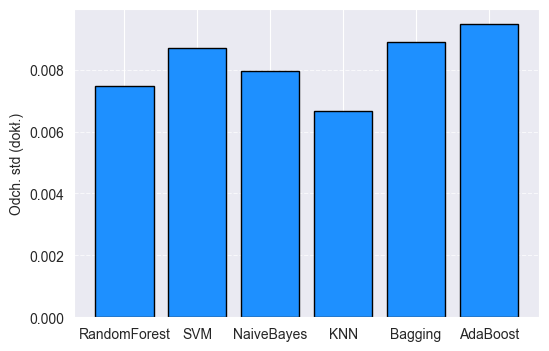

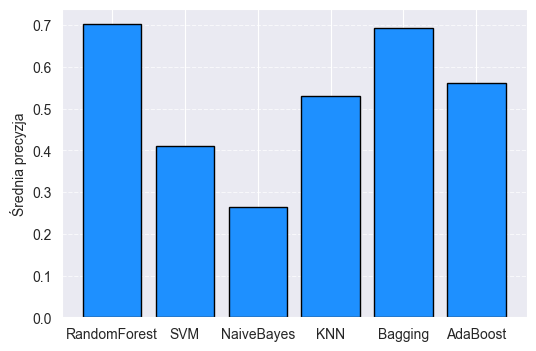

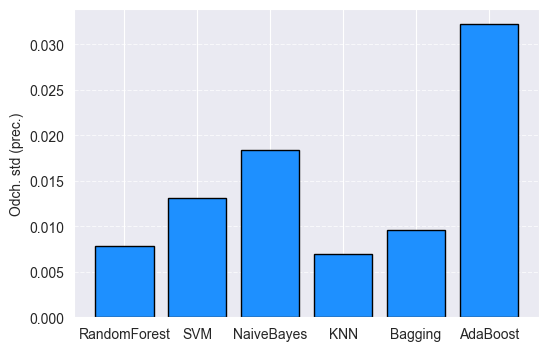

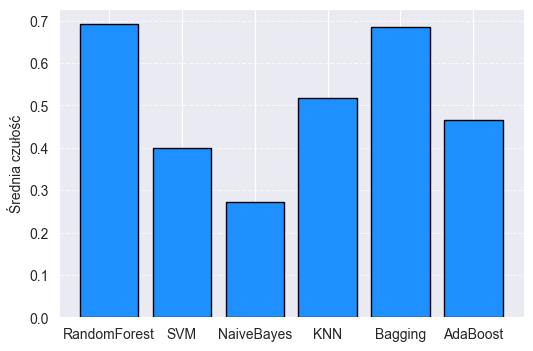

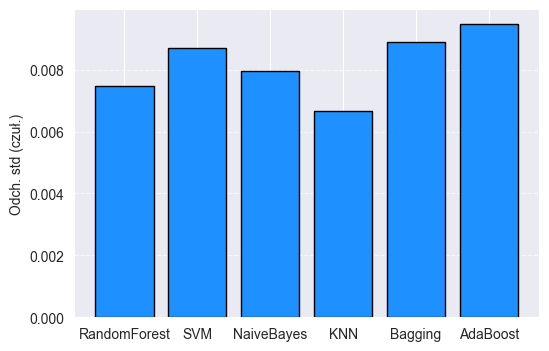

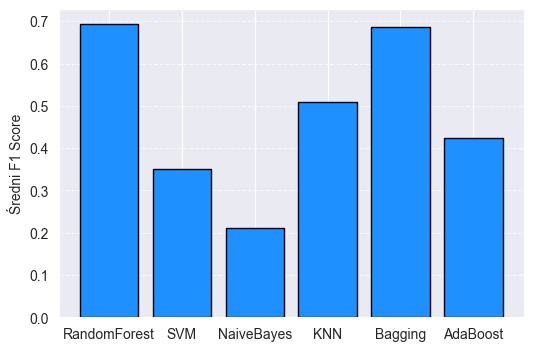

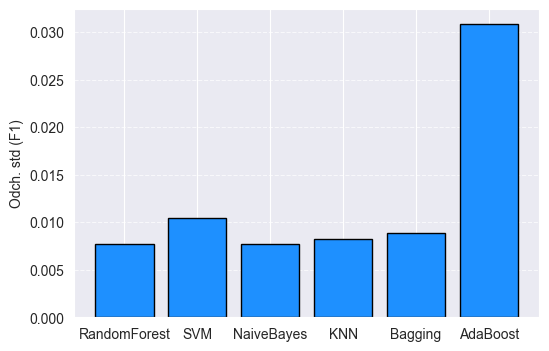

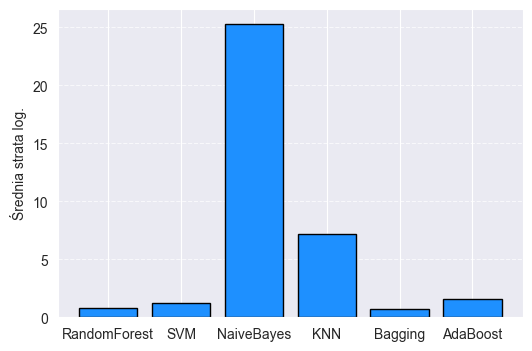

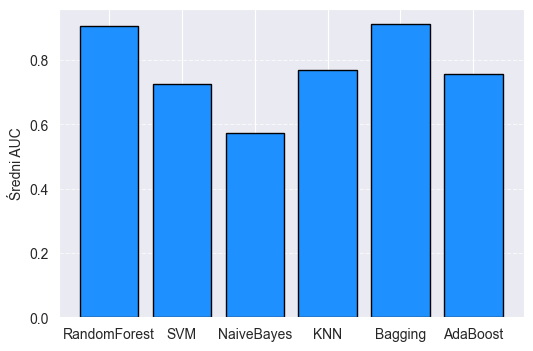

In [9]:
import matplotlib.pyplot as plt

for metric in df.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df["Model"], df[metric], color="dodgerblue", edgecolor="black")
    #plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

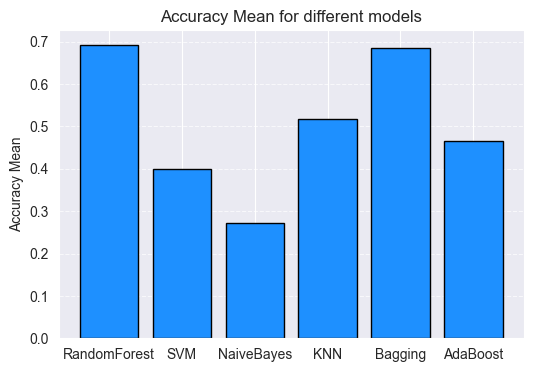

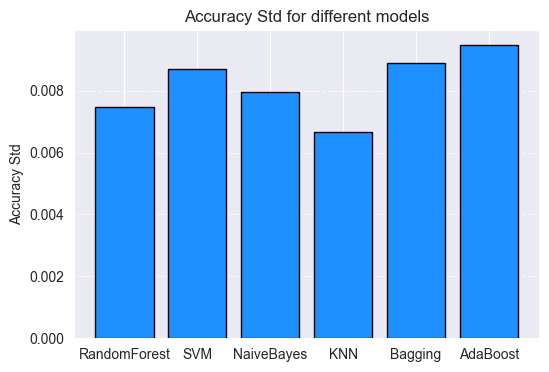

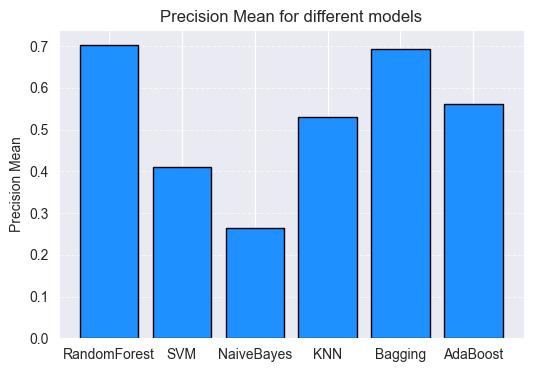

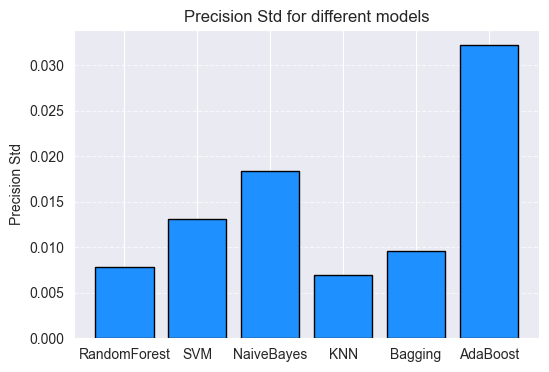

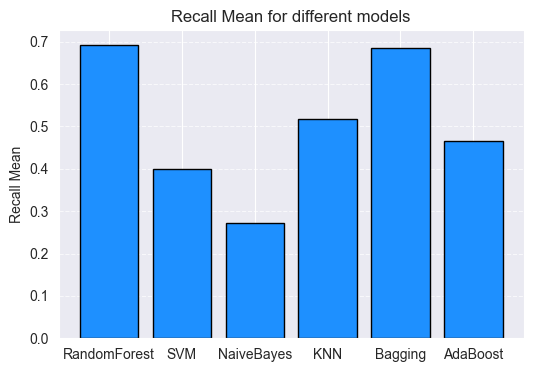

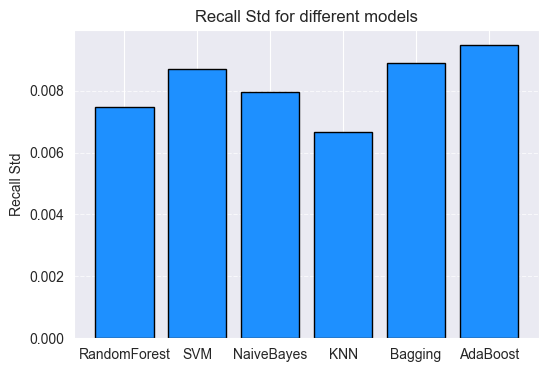

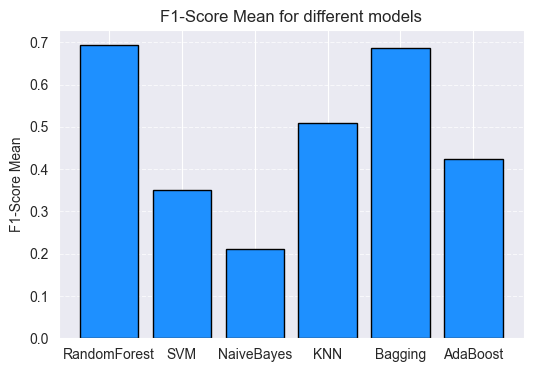

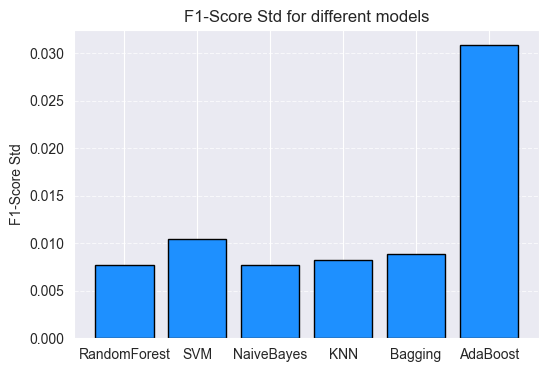

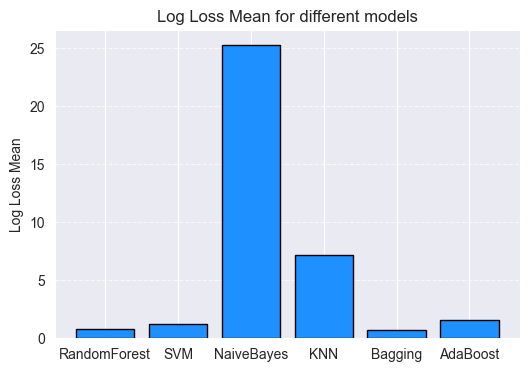

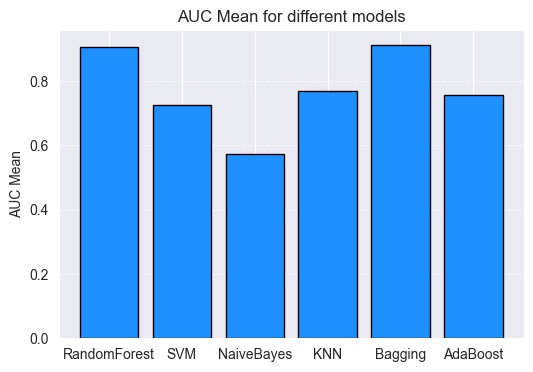

Best model: RandomForest with F1-Score = 0.6936390241361721
Worst model: NaiveBayes with F1-Score = 0.21084868702854745


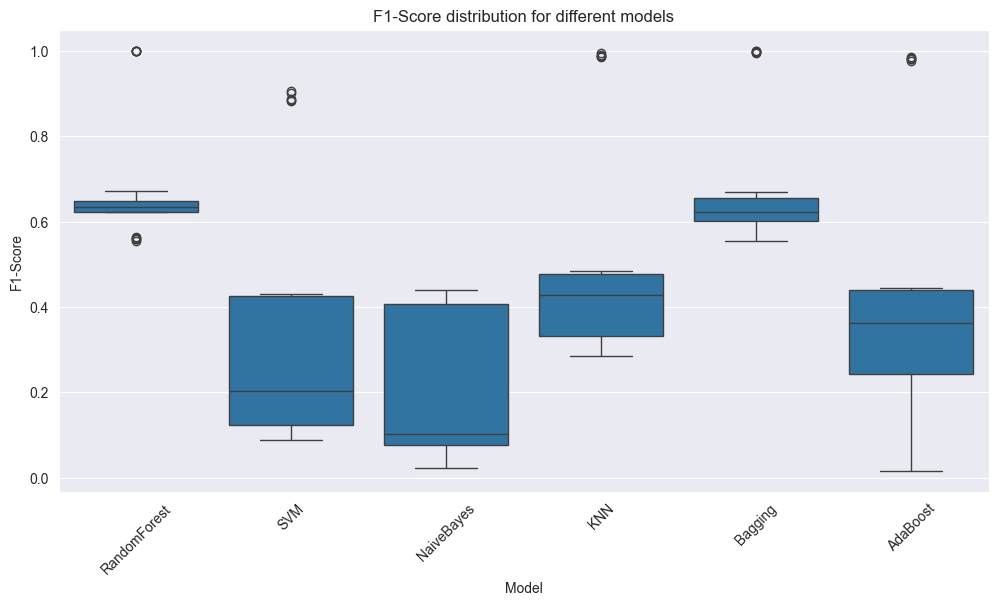

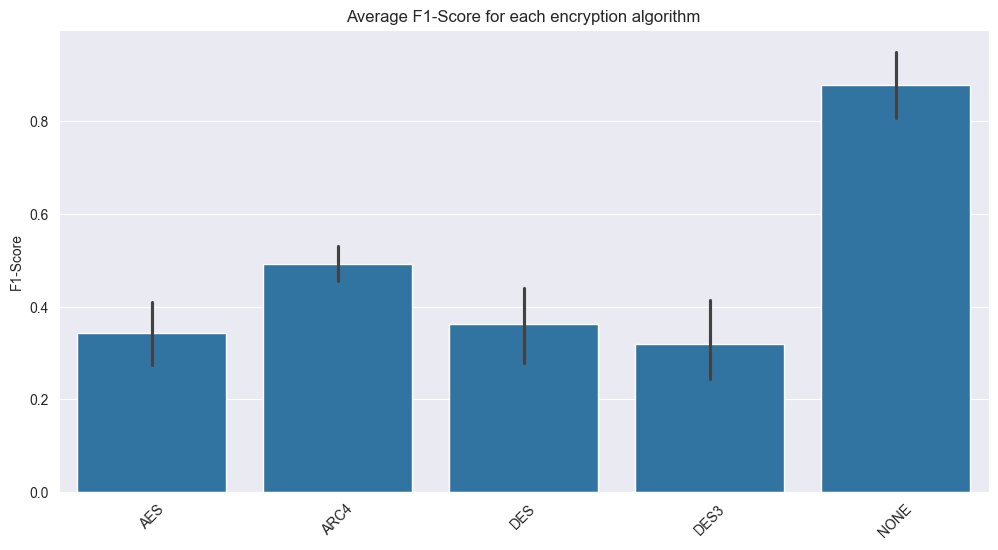

In [14]:
for metric in df_results.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[metric], color="dodgerblue", edgecolor="black")
    plt.title(f"{metric} for different models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
model_scores = df_class_results.groupby("Model")["F1-Score"].mean().sort_values(ascending=False)

best_model = model_scores.idxmax()
worst_model = model_scores.idxmin()
print(f"Best model: {best_model} with F1-Score = {model_scores.max()}")
print(f"Worst model: {worst_model} with F1-Score = {model_scores.min()}")

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("F1-Score distribution for different models")
plt.ylabel("F1-Score")
plt.show()

class_scores = df_class_results.groupby("Class")["F1-Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=encoder.classes_[df_class_results["Class"]], y="F1-Score", data=df_class_results)
plt.xticks(rotation=45)
plt.title("Average F1-Score for each encryption algorithm")
plt.ylabel("F1-Score")
plt.show()

In [16]:
df_class_results_6keys = pd.read_csv('training_3000_ecb/df_class_results_3000_ecb_6keys.csv')
df_class_results_6keys

,Unnamed: 0,Model,Class,Precision,Recall,F1-Score
0,0,RandomForest,0,0.526252,0.609618,0.564875
1,1,RandomForest,1,0.583433,0.675000,0.625885
2,2,RandomForest,2,0.696284,0.582432,0.634290
3,3,RandomForest,3,0.675941,0.577622,0.622926
4,4,RandomForest,4,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
145,145,AdaBoost,0,0.372549,0.054363,0.094881
146,146,AdaBoost,1,0.290732,0.947586,0.444948
147,147,AdaBoost,2,0.462567,0.239281,0.315406
148,148,AdaBoost,3,0.409091,0.012329,0.023936
